# Entrega 3 - Clasificadores (Naive Bayes, KNN)

### Grupo 07:
     - Renzo Gambone C.I. 5.155.486-4
     - Germán Ouviña C.I. 4.823.566-1
     - Leandro Rodríguez C.I 4.691.736-4


## 1. Introducción
***
### 1.1. Objetivo
***
El objetivo de esta tarea fue implementar clasificadores basados en dos tipos de aprendizaje: **aprendizaje bayesiano** y **aprendizaje basado en casos**. Más especificamente, los modelos utilizados fueron **bayes sencillo** y **k vecinos más cercanos** respectivamente. Una vez generados distintos clasificadores en base a ciertos parámetros, se evaluó la performance de los mismos utilizando distintos tipos de métricas y se compararon dichas evaluaciones con el fin de determinar cual modelo se ajustó mejor a cada escenario. Como agregado, se compararon los resultados obtenidos con los resultados obtenidos en el laboratorio anterior.

En términos formales, los parámetros del problema se reducen a lo siguiente:
- **Tarea *T*:** Clasificar ejemplos de un conjunto restringido a cierto formato dado.
- **Experiencia *E*:** Conjunto de datos del formato apropiado con ejemplos previamente clasificados.
- **Performance *P*:** Múltiples tipos de medidas (las cuales se profundizan en la sección 3).

### 1.2. Entrega
***
La entrega de esta tarea consta de dos grandes componentes:
- **Informe** en formato de Jupyter Notebook (este informe).
- **Programa** que permite entrenar clasificadores, evaluar su desempeño y clasificar nuevos ejemplos.

El objetivo del informe es centralizar la información relativa a la construcción de los distintos modelos, así como los datos obtenidos mediante pruebas realizadas con varias configuraciones paramétricas. Como agregado opcional, se adjuntan algunos scripts para ayudar a la lectura o probar en tiempo real ciertas funcionalidades.

Por otra parte, el programa ofrece una interfaz en consola que permite entrenar y evaluar clasificadores acorde a múltiples configuraciones paramétricas. También se incluyen todas las herramientas desarrolladas en la anterior entrega, pudiendo entrenar y evaluar modelos basados en árboles o bosques de decisión. Si bien todas estas herramientas fueron pensadas para uso del grupo, en el archivo *README.md* se adjunta una sencilla guía de como utilizarlas.

### 1.3. Formato
***
En las siguientes secciones se especifica el diseño de cada modelo, justificando la toma de decisiones a la hora de construirlos y detallando las estrategias o algoritmos que fueron implementados para la configuración paramétrica, junto a las métricas utilizadas en la evaluación. Luego, se detalla la metodología de experimentación y con la misma los resultados obtenidos para cada modelo y cada conjunto de datos, habiendo entrenado con distintas configuraciones paramétricas. Finalmente se agregan conclusiones respecto a los resultados obtenidos.

Como detalle importante, dado que la consigna de la actual entrega presenta varias similitudes con la de la entrega anterior, se reutilizaron varios conceptos. A continuación se realiza una breve descripción del contenido de cada sección, especificando aquellas subsecciones que reutilizan contenido (las cuales son denotadas por un asterisco en su título), con el objetivo de facilitar una lectura que tenga en cuenta el informe anterior.

La sección 2 (**Diseño**) reutiliza los conceptos de **preprocesamiento** y **evaluación** de la entrega anterior. Con respecto al diseño de **modelos** y **algoritmos**, nada es reutilizado, dado que los modelos son distintos.

La sección 3 (**Experimentación**) reutiliza la estructura de la tarea anterior, siguiendo una metodología similar. De todas formas, al tratarse de nuevos resultados, no se reutiliza más que la estructura de la tarea anterior. Además, se agregan nuevos scripts para facilitar la visualización de la información.

La sección 4 (**Conclusiones**) cuenta con una nueva lista de conclusiones extraídas de la realización de esta tarea, por lo que no comparte nada salvo ciertas comparaciones comparaciones con la tarea anterior.

## 2. Diseño
***
En esta sección se detallan las características del diseño utilizado para construir el modelo, se profundizan las estrategias y algoritmos empleados en la configuración paramétrica y se tratan otros puntos como el procesamiento previo al entrenamiento y la evaluación posterior al mismo.

### 2.1. Modelo
***
La consigna propone la utilización y comparación de dos tipos de modelos basados en distintos métodos de aprendizaje supervisado. A continuación, se especifican las características de cada uno:

**Notas:**
* No se ahonda en dichas descripciones puesto que son conceptos trabajados en el teórico.
* Se utiliza notación matemática para visualizar fácilmente la definición de cada modelo.

#### 2.1.1. Bayes sencillo (Naive Bayes)
***
Para este escenario uno de los modelos propuestos es el de **bayes sencillo** (a partir de ahora denominado **naive bayes** o **NB**), un modelo bayesiano que, al asumir independencia entre cada atributo del conjunto de datos, "simplifica" la interpretación de las frecuencias o **probabilidades** de los valores de cada atributo y permite utilizar el *Teorema de Bayes* para clasificar nuevos ejemplos con probabilidad.

Se definen más formalmente las siguientes nociones:
* $D =$ Conjunto de entrenamiento
* $C_D =$ Conjunto de posibles clasificaciones para $d \in D$
* $NB_D =$ Clasificador bayesiano generado en base a $D$
* Se representa una clasificación de un ejemplo $d \in D$ realizada por el clasificador bayesiano $NB_D$ como $NB_D(d) = (c, p) : c \in C_D$ y $p \in [0..1]$

#### 2.1.2. K vecinos más cercanos (KNN)
***
El otro modelo propuestos es el de **k vecinos más cercanos** (a partir de ahora denominado **KNN**), un modelo basados en casos, el cual representa el conjunto de datos como un espacio de **$n$ dimensiones** (siendo $n$ la cantidad de atributos) y clasifica nuevos ejemplos basandose en la clasificación de los $k$ vecinos más cercanos al ejemplo en cuestión, utilizando algún tipo de medida de distancia.

Se definen más formalmente las siguientes nociones:
* $D =$ Conjunto de entrenamiento
* $C_D =$ Conjunto de posibles clasificaciones para $d \in D$
* $KNN_{(D,k)} =$ Clasificador de KNN generado en base a $D$ y evaluando los $k$ vecinos más cercanos
* Se representa una clasificación de un ejemplo $d \in D$ realizada por el clasificador $KNN_{(D,k)}$ como $KNN_{(D,k)}(d) = (c, p) : c \in C_D$ y $p \in [0..1]$

Los detalles sobre los algoritmos de entrenamiento y clasificación utilizados por cada modelo se expanden en la sección 2.3.


### 2.2. Preprocesamiento
***
Con los objetivos tanto de hacer viable como de mejorar la performance de entrenamiento, se realizaron ciertos cambios en el conjunto de datos a utilizar. A continuación, se listan los cambios realizados agrupandolos en base a motivación y área cambiada en el conjunto original.

**Notas:**
* Los cambios realizados en el conjunto de datos fueron hechos en memoria, sin modificar de forma alguna los archivos originales.
* Los cambios como *interpretación de atributos continuos*, *normalización de rangos*, etc. son inherentes a ciertos modelos y por lo tanto no se especifícan en esta sección, tratandose en la sección correspondiente a cada algoritmo.

#### 2.2.1. Optimización (Representación) (*)
***
La elección de la representación interna fue compleja, ya que se tuvo en cuenta tanto la performance como la facilidad a la hora de programar e interpretar el código. Siguiendo el ejemplo de la entrega anterior, se determinó la utilización del objeto **DataFrame** de la biblioteca *pandas*. Al principio trajo muchos problemas de performance (tanto en uso de memoria como en velocidad) pero al implementar técnicas ofrecidas por la biblioteca dichos problemas se palearon, generando eventualmente un uso de memoria reducido y un entrenamiento veloz.

#### 2.2.2. Estructura (Atributos)
***
Originalmente se buscó mantener la estructura de atributos estática, con el fin de impactar lo menos posible en el entrenamiento y su posterior evaluación. No obstante, para el segundo conjunto de datos (detallado en la sección 2.4), fue necesario cambiar la estructura eliminando varios atributos y generando otros nuevos.

Más concretamente, el cambio realizado fue el proceso inverso al conocido como *one hot encoding*, ya que habia múltiples atributos que representaban "la idea" de un sólo atributo discreto. En múltiples problemas, la implementación de dicho algoritmo resulta de gran utilidad para mejorar el rendimiento tanto a nivel de performance como de clasificación, generando $x$ atributos binarios para $x$ posibles valores del atributo original. 

Tomando la experiencia de la tarea anterior y teniendo en cuenta que **Naive Bayes** y **KNN** pueden trabajar con *one hot encoding*, se agregó la posibilidad de deshacerlo o de mantenerlo, con el fin de comprobar si el cambio influye en la performance de alguno de los modelos. En la sección 3 se muestran los resultados de dicho experimento.

### 2.3. Algoritmo
***
En la siguiente sección se centralizan todas las especificaciones relativas a los algoritmos empleados, tanto para entrenar como para clasificar.

**Notas:**
* Se separa la especificación para **NB** y **KNN**.
* Se hace referencia a puntos mencionados en secciones anteriores, sin entrar en detalle en lo que ya fue explicado.

#### 2.3.1. Especificación - Naive Bayes
***
Un clasificador **Naive Bayes** trabaja con **atributos discretos** y una **clasificación discreta**. En este aspecto, no difiere de los **árboles de decisión** utilizados en la anterior tarea. No obstante, tanto la forma de *entrenar* como de *clasificar* si difiere, ya que se fundamenta en otros principios.

Como se mencionó anteriormente, **Naive Bayes** es un modelo bayesiano, por lo que determina probabilidades en base al conjunto de entrenamiento y clasifica nuevos ejemplos sirviendose de las mismas, así como del *Teorema de Bayes*. Debido a esto, cuenta con sus propias particularidades y distintos parámetros a configurar.

A continuación se tratan dichas particularidades, así como el algoritmo de entrenamiento y el de clasificación.

##### 2.3.1.1. Algoritmo de entrenamiento
***
El algoritmo de entrenamiento implementado para **Naive Bayes** sigue las pautas del visto en el teórico. Se utilizan las siguientes nociones:

- $D$ representa el conjunto de ejemplos.
- $C_D$ representa el conjunto de clases en $D$.
- $A_D$ representa el conjunto de atributos en $D$.
- $f : D \rightarrow C_D : f(d) = c$ representa la función de clasificación para un ejemplo existente en $D$.
- $g_a : D \rightarrow Val(a) : g_a(d) = v$ representa la función que determina el valor del atributo $a$ para un ejemplo existente en $D$.
- $D_c = {d \in D : f(d) = c}$ representa el subconjunto de $D$ donde cada ejemplo es clasificado como clase $c$.
- $D_{a, v, c} = {d \in D : f(d) = c, g_a(d) = v}$ representa el subconjunto de $D$ donde cada ejemplo con valor $v$ en el atributo $a$ es clasificado como clase $c$.

En resumen, el algoritmo consiste en recorrer $D$ y para cada clase y cada posible valor de cada atributo, obtener las siguientes probabilidades:

- $\forall c \in C_D$, se calcula la siguiente probabilidad, la cual representa la frecuencia de clasificaciones con clase $c$ en $D$.

$$P(c) = \frac{|D_c|}{|D|}$$

- $\forall a \in A_D$ y $\forall v \in Val(a)$, se calcula la siguiente probabilidad, la cual representa la frecuencia de clasificaciones con clase $c$ en $D$ y que en sus ejemplos el atributo $a$ cuenta con el valor $v$. 

$$P(v|c) = \frac{|D_{a, v, c}|}{|D|}$$

Dichas probabilidades se almacenan en una estructura para utilizarse al momento de clasificar.

##### 2.3.1.2. Algoritmo de clasificación
***
El algoritmo de clasificación implementado para **Naive Bayes** sigue las pautas del visto en el teórico. Se utilizan las nociones definidas en el punto anterior.

En resumen, el algoritmo consiste en aplicar el *Teorema de Bayes* y calcular para cada clase $c \in C_D$ la probabilidad condicional de que, dado $D$, la clasificación del ejemplo en cuestión sea $c$. Como **Naive Bayes** se fundamenta en asumir que los valores de cada atributo son **independientes**, se utilizan las siguientes nociones:

- Sea $e$ el ejemplo a clasificar.
- Sea $v_i$ el valor del i-ésimo atributo en $e$
- $\forall c \in C_D$, se calcula la probabilidad de que el ejemplo $e$ sea de clase $c$, utilizando la siguiente fórmula:

$$P(e|c) = \prod_{i \in [1..|A_D|]} = P(v_i|c) * P(c)$$

- El clasificador toma la mayor de las probabilidades anteriormente calculadas y devuelve la clase correspondiente:

$$NB_D(e) = argmax_{c \in C_D} P(e|c)$$

##### 2.3.1.3. Interpretación de atributos continuos
***
Una característica clave para el escenario propuesto y que **Naive Bayes** no contempla es **el tratamiento de atributos continuos**. Se emplearon **dos estrategias** distintas para interpretar los valores de tales atributos, teniendo como fin las mismas el poder obtener una probabilidad para cualquier valor dado. Dichas estrategias son las siguientes:

- **Distribución normal:** Sea $a$ el atributo en cuestión y $Val(a)$ el conjunto de posibles valores para el mismo, se interpreta $Val(a)$ como una variable aleatoria con **distribución normal**, calculandose su media y desviación estándar a partir de la muestra en $D$. Dicha media $\mu$ y desviación $\sigma$ se almacenan en el clasificador. Luego, para ejemplos a clasificar, se toma el valor $v_a$ del atributo $a$ y se utiliza la **función de densidad normal** para calcular su probabilidad:
$$P(v_a) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$
    De esta forma, incluso para valores continuos que no aparecieron en $D$, se puede obtener una probabilidad. Dado que **Naive Bayes** trabaja originalmente con atributos continuos, esta estrategia puede tener un impacto negativo en la eficiencia. Dichos problemas se tratan con más profundidad en la sección 3.


- **Intervalos variables:** Sea $a$ el atributo en cuestión y $Val(a)$ el conjunto de posibles valores para el mismo, se genera un número variable de intervalos a partir de $Val(a)$, ordenando $D$ según $a$ y partiendo $Val(a)$ cada vez que se encuentra un cambio en la clasificación $c$. En resumen, se **discretiza** al atributo $a$ siguiendo la estrategia utilizada en la tarea de **árboles de decisión**.

    Es importante aclarar que se tomó la decisión de discretizar según esta estrategia y no las otras utilizadas en la tarea anterior (partir en dos intervalos fijos o partir en dos intervalos maximizando la ganancia) porque se identificó que la menor pérdida de información está asociada a esta estrategia. De hecho, **Naive Bayes** no trabaja con los conceptos de **ganancia** utilizados por los árboles de decisión, y partir solamente en dos intervalos podría resultar negativo para conjuntos $Val(a)$ esparsos.

##### 2.3.1.4. Implementación de m-estimador
***
Existe un "caso borde" al calcular la probabilidad $P(v|c) = \frac{|D_{a, v, c}|}{|D|}$, el cual es el caso donde no hay ejemplos para alguna de las clases. En este escenario, la probabilidad asignada a dicha clase sería 0. Teniendo esto en cuenta, el producto de las probabilidades también sería igual a 0, independientemente del resto de los atributos. Esto puede causar pérdida de información necesaria, afectando el rendimiento del clasificador.

Para prevenir este problema, se agregó lo que se denomina un **m-estimador**, que aplica la técnica denominada *additive smoothing*, la cual es utilizada para suavizar la distribución de atributos discretos. Su inventor fue Pierre-Simon Laplace, llamandosele *laplace smoothing* cuando el valor elegido es $m = 1$.

De esta forma, se pasa a calcular la probabilidad anteriormente mencionada, utilizando la siguiente fórmula:

$$P(v|c) = \frac{|D_{a, v, c}| + mp}{|D| + m}$$

Siendo $P$ la estimación a priori de la probabilidad buscada y $m$ el valor elegido como **m-estimador**, $m$ determina que tan fuerte ponderar $P$ respecto a los datos observados. Desde la perspectiva Bayesiana, este cambio causa el aumento de la muestra con $m$ ejemplos virtuales, distribuidos acorde a $p$.

Debido a que la elección para el valor de $m$ no es trivial, el mismo fue uno de los parámetros cuyo valor fue alternado para la configuración paramétrica. Se expande este punto en la sección 3.

#### 2.3.2. Especificación - KNN
***
Un clasificador **KNN** trabaja con **atributos continuos** y una **clasificación discreta**. En este aspecto, difiere bastante de los **árboles de decisión** utilizados en la anterior tarea. Además de esto, cuenta con otra particularidad: la etapa de *entrenamiento* "no existe" en términos formales y cada clasificación se realiza utilizando el conjunto de datos completo.

Como se mencionó anteriormente, **KNN** es un modelo basado en casos, por lo que utiliza los ejemplos que se parezcan más al ejemplo a clasificar, según algún tipo de métrica, y clasifica tomando una decisión en relación a las clasificaciones de los valores cercanos.

A continuación se tratan las particularidades anteriormente mencionadas, así como el algoritmo de entrenamiento y el de clasificación.

##### 2.3.2.1. Algoritmo de entrenamiento
***
El algoritmo **KNN** no cuenta con una etapa de entrenamiento propiamente dicha. De hecho, lo que se denomina como entrenamiento en esta implementación, consiste en realizar un **preprocesamiento** de los datos para poder manipularlos con mayor facilidad a la hora de clasificar, así como eliminar ruido y otras cuestiones menores. Dichos cambios son independientes al preprocesamiento realizado al principio (explicitado en la sección 2.2).

Dentro del procesamiento propio a **KNN**, se realizan dos tareas:
1. **Normalización de valores:** Utilizando una de varias posibles estrategias, se normalizan todos los valores del conjunto de datos, con el objetivo de mantener ''las proporciones'' pero no priorizar atributos con valores grandes en el cálculo de distancias. Las posibles estrategias se tratan en la sección 2.3.2.3.
2. **Almacenamiento en estructuras auxiliares:** Utilizando una de varias posibles estrategias, se toma el conjunto de datos y se lo almacena utilizando una estructura acorde, con el fin de facilitar el proceso de clasificación. Las posibles estructuras se tratan en la sección 2.3.2.4.

En resumen, el algoritmo consiste en recorrer $D$, aplicando la normalización que corresponda, almacenando los valores auxiliares de dicha normalización que permitan normalizar nuevos ejemplos y generando las estructuras auxiliares que correspondan.

##### 2.3.2.2. Algoritmo de clasificación
***
El algoritmo de clasificación implementado para **KNN** sigue las pautas del visto en el teórico. Se utilizan las siguientes nociones:

- $D$ representa el conjunto de ejemplos.
- $C_D$ representa el conjunto de clases en $D$.
- $f : D \rightarrow C_D : f(d) = c$ representa la función de clasificación para un ejemplo existente en $D$.
- $d : D \times D \rightarrow \mathbb{R}^{+} \cup \{0\}$ representa la función de distancia entre un par de ejemplos de $D$.
- $D_{d, e}$ representa el conjunto de ejemplos $D$ ordenado ascendentemente según la distancia $d(e,x) \forall x \in D$
- $g : D \times (x_1,...,x_k) \rightarrow C_D$ representa la función de votación para un subconjunto de $k$ ejemplos $x_i \in D : i \in [1..k]$, la cual elige una clase $c \in C_D$ en base a las clases $f(x_i)$.

En resumen, el algoritmo consiste en calcular la **distancia** del ejemplo a clasificar para todo el conjunto $D$ y obtener los $k$ vecinos más cercanos según esa distancia. Luego, utilizando un **algoritmo de votación**, se elige la clasificación del ejemplo en cuestión. Se utilizan las siguientes nociones:

- Sea $e$ el ejemplo a clasificar
- Sea $k$ la cantidad de vecinos a evaluar
- $\forall x \in D$, se calcula la distancia $d(e,x)$ de $e$ a todos los ejemplos en $D$
- Sea $X = (x_1,...,x_k) : x_i \in D_{d,e} \wedge i \in [1,k]$, es decir, los primeros $k$ elementos de $D_{d,e}$ (los vecinos más cercanos a $e$), se utiliza las clases $f(x_i)$ y la función $g$ de votación anteriormente mencionada para que el clasificador devuelva la clase correspondiente para $e$:

$$KNN_D(e) = g(e, X)$$

Tanto la **función de distancia** $d$ como la **función de votación** $g$ se pueden tomar de distintas estrategias posibles, por lo que se expanden en las secciones 2.3.2.5 y 2.3.2.6 respectivamente.

##### 2.3.2.3. Estrategias de normalización
***
La implementación "original" de **KNN** no toma en cuenta la posibilidad de normalizar los datos. No obstante, cuando el rango de valores de un atributo es mucho mayor al resto, esto provoca que el atributo en cuestión influya mucho más en el cálculo de distancias, independientemente a la función de distancia utilizada (en la sección 2.3.2.5 se profundiza en la relación entre las distancias y los valores de los atributos).

Con el objetivo de no priorizar ningún atributo sobre otro, y a la vez mantener las proporciones y perder la menor cantidad de información posible, se introduce la técnica de **normalización**. Se utilizaron **tres estrategias** distintas para normalizar:

- **Norma euclídea:** Interpretando el conjunto $D$ como un espacio vectorial de $n$ dimensiones (siendo $n = |A_D|$ la cantidad de atributos), una forma de normalizar cada elemento de $D$ es interpretarlo como un *vector* y dividir cada una de sus *coordenadas* entre su *norma*.

    Sea $x \in D$ un ejemplo representado como un vector, cada una de sus coordenadas es su valor para cada atributo. La norma de $x$ se representa como $||x|| = d(x,0)$ siendo $d$ la función de **distancia** definida para ese espacio vectorial. Independiente a la función de distancia utilizada por **KNN**, se eligió la **distancia euclídea** (en la sección 2.3.2.5 se trata esta distancia) para calcular la norma de un vector $x$.
    
    Teniendo esto en cuenta, el normalizar un vector consiste en dividirlo por su norma, obteniendo un **versor**, el cual es un vector con norma 1 en el espacio vectorial. El manejar un conjunto de versores provoca que sus coordenadas entren en un intervalo menor, reduciendo el problema anteriormente mencionado y manteniendo proporciones.
    
    De esta forma, se normalizó cada vector $x \in D$ utilizando la siguiente fórmula:

    $$x' = \frac{x}{||x||} = \sum_{i = 1}^{n} \frac{x_i}{||x||}$$

- **Reescalamiento:** Como su nombre indica, se cambia la escala para cada atributo, manteniendo la proporción o separación entre sus valores. Dicha escala lleva el rango del atributo, independientemente a su tamaño, a un rango $[0,1]$. Para ello, realiza una inspección para todos los valores de dicho rango. 

    Sea $x \in D : x = (x_1,...,x_n)$, siendo $x_i$ el valor en $x$ para el i-ésimo atributo, se determina para cada atributo $a_i \in A_D$ los valores $min(a_i)$ y $max(a_i)$ como el mínimo y el máximo valor respectivamente para el i-ésimo atributo $a_i$ en todos los ejemplos de $D$. Teniendo esto en cuenta, el reescalar un ejemplo consiste en llevar cada valor del mismo a un rango $[0,1]$.
    
    De esta forma, se reescaló cada ejemplo $x \in D$ utilizando la siguiente fórmula:

    $$x' = (x_1',...,x_n') : x_i' = \frac{x_i - min(a_i)}{max(a_i) - min(a_i)}$$

- **Estandarización:** Esta estrategia consiste en interpretar el rango de un atributo $a_i$ como una variable aleatoria siguiendo una **distribución normal**. Se utiliza un proceso similar al del reescalamiento, estudiando el rango completo de $a_i$, obteniendo la **media** y la **desviación estándar** del mismo y finalmente ajustando el rango de cada atributo a una escala menor.

    Sea $x \in D : x = (x_1,...,x_n)$, siendo $x_i$ el valor en $x$ para el i-ésimo atributo, se determina para cada atributo $a_i \in A_D$ los valores $\mu_i$ y $\sigma_i$ como la media y la desviación estándar para el i-ésimo atributo $a_i$ en todos los ejemplos de $D$. Teniendo esto en cuenta, el estandarizar un ejemplo consiste en llevar cada valor del mismo a un rango menor. Más concretamente, consiste en transformar la distribución actual $N(\mu_i, \sigma_i)$ en una distribución $N(0,1)$, es decir, modificar los datos para que la media $\mu_i = 0$ y la desviación estándar $\sigma_i = 1$.
    
    Es importante marcar que, a diferencia del reescalamiento, el cual asegura que el nuevo rango es $[0,1]$, el rango de $N(0,1)$ no está específicamente definido. Se sabe que los valores entran en el rango $[-1,1]$ con una gran probabilidad ($\approx 90\%$), pero los **outliers** o valores atípicos pueden alejarse mucho de la distribución normal, quedando fuera del rango.
    
    De esta forma, se estandarizó cada ejemplo $x \in D$ utilizando la siguiente fórmula:

    $$x' = (x_1',...,x_n') : x_i' = \frac{x_i - \mu_i}{\sigma_i}$$


Cabe mencionar que, además de las estrategias anteriormente mencionadas, también está vigente la opción de **no normalizar**. Como se mencionó anteriormente, puede tener un impacto negativo en la clasificación, pero esto no es necesariamente cierto. En la sección 3 se estudia esto con mayor profundidad.

##### 2.3.2.4. Estructuras de almacenamiento
***
La implementación "original" de **KNN** utiliza el conjunto de datos $D$ completo para obtener los $k$ vecinos más cercanos a un ejemplo dado. No obstante, para conjuntos $D$ de gran tamaño, el tener que calcular una distancia para cada ejemplo y luego obtener los $k$ ejemplos más cercanos, en el mejor de los casos requiere una recorrida completa al conjunto $D$ para **cada ejemplo a clasificar**. Si se quiere realizar una evaluación de un conjunto de gran tamaño, el tiempo de ejecución puede escalar a magnitudes inconvenientes.

Tomando esto en cuenta, con el objetivo de mejorar la performance y poder realizar más evaluaciones con **KNN**, se utilizaron **dos estrategias** distintas para almacenar los datos:

- **Conjunto de datos:** La estrategia original, almacenar $D$ en una estructura **DataFrame** de *pandas* y realizar el calculo de distancias con operaciones vectoriales. Minimizando la cantidad de operaciones costosas y vectorizando todas aquellas operaciones que se hicieran iterativamente, se logró reducir notablemente el tiempo de ejecución, manteniendo resultados y manteniendo también la **estructura de almacenamiento**. No obstante, para conjuntos de gran tamaño, los tiempos de ejecución obtenidos eran demasiado largos.


- **Árbol KDTree:** Además de almacenar $D$ en la estructura anteriormente mencionada, se agregó la opción de almacenar $D$ también en otra estructura que permitiera obtener los $k$ vecinos más cercanos a un ejemplo dado de forma más veloz. Para ello, se utilizó la clase *sklearn.neighbors.KDTree*, la cual permite generar una estructura denominada **KDTree** y realizar búsquedas utilizando los métodos *query* o *query_radius*.

    Dado que el método *query* representa exactamente lo que la tarea pide implementar, se utilizó el método *query_radius*, obteniendo para un ejemplo $e$ todos los vecinos $x$ que cumplieran $d(e,x) \leq 1$. Dichos vecinos se devuelven de forma ordenada ascendentemente según su distancia a $e$, por lo que basta con tomar los primeros $k$. Si los vecinos obtenidos no llegan a ser $k$, se incrementa la distancia a 8 y se repite el algoritmo incrementando la distancia en potencias de 2 hasta encontrar $k$ vecinos.
    
    La ventaja de implementar un **KDTree** radica en como almacena los ejemplos: utiliza un árbol binario donde cada nivel representa una de las $k$ dimensiones del espacio vectorial que representa $D$. Dichas dimensiones se intercalan, por lo que el primer si el primer nivel representa la primera dimensión, el k+1-ésimo nivel representara de nuevo a la primera dimensión. De esta forma, al generar el árbol se van guardando ejemplos de $D$ en nodos y se elige la siguiente rama en base a la comparación de la coordenada de la dimensión del nodo actual frente a la coordenada de la dimensión del ejemplo. Si el ejemplo es mayor, se baja por el árbol hacia la rama derecha, y si no, hacia la izquierda. Este mismo principio es utilizado para clasificar.
    
    Para bajar a tierra el concepto, se plantea un ejemplo de un KDTree en 2 dimensiones, el cual se construiría de la siguiente manera:

    Sean el conjunto de datos compuesto por los puntos (3, 6), (17, 15), (13, 15), (6, 12), (9, 1), (2, 7), (10, 19). Primero se inserta (3, 6) en la raíz dado que el árbol aún es vacío. Cuando se va a insertar (17, 15), como la raíz está alineada por el eje $x$, se compara el valor de la coordenada en $x$ del nuevo punto con el de la raíz. Como el valor es mayor, el punto va a ser la raíz del subárbol izquierdo y ese nodo va alinearse con respecto al eje $y$. Luego se inserta el punto (13, 15). En la raíz, verificando el valor de $x$ se comprueba que se va a encontrar en el subárbol derecho. En el nodo siguiente tambien lo hará, habiendo comparado por el eje $y$. Este nuevo nodo va a alinearse con respecto al eje $x$. Siguiendo el mismo procedimiento de comparar la coordenada $x$ o $y$ según la alineación del nodo actual, el árbol queda definido como sigue:

    <div style="display: inline-block; width: 99%; text-align: center; margin-top: 16px;">
        <img src="img/kdtree1.jpg" />
        <label style="margin-top: 16px; font-size: 16px; font-family: monospace;"> Figura 2.1 - Ejemplo de KDTree de dimensión 2</label>
    </div>

    Dado que es un ejemplo de 2 dimensiones, se puede visualizar como queda particionado el espacio:

    <div style="display: inline-block; width: 99%; text-align: center; margin-top: 16px;">
        <img src="img/kdtree2.jpg" />
        <label style="margin-top: 16px; font-size: 16px; font-family: monospace;"> Figura 2.2 - Ejemplo de espacio para KDTree de dimensión 2</label>
    </div>

    Teniendo en cuenta lo anterior, la búsqueda de vecinos en un **KDTree** para cierta cantidad $k$ de vecinos en relación al tamaño del conjunto $D$, será mucho más veloz que el tener que recorrer todo el conjunto, ya que las búsquedas en promedio son de orden $O(log$ $n)$.
    
Es importante destacar que, si bien se generaron ambas soluciones, se priorizó utilizar el conjunto de datos original, relegando la utilización del KDTree para casos donde el tiempo de ejecución fuera crucial. En la sección 3 se trata este tema con mayor profundidad.

##### 2.3.2.5. Medidas de distancia
***
La implementación "original" de **KNN** no determina una medida de distancia en específico. Teniendo esto en cuenta, se investigaron las métricas de distancia más comunes y sus distintas aplicaciones.

Una métrica clave utilizada en espacios vectoriales normados es la **distancia de Minkowski**, la cual establece la fórmula general:

$$d_p(x,y) = (\sum_{i=1}^{n} |x_i - y_i|^p)^{1-p} : x = (x_1,...,x_n), y = (y_1,...,y_n)$$

Cuando $p \geq 1$, $d_p$ es efectivamente una distancia (es decir, cumple con las propiedades). De dicha métrica se pueden obtener varias distancias variando $p$, las cuales cuentan con propiedades específicas. En este contexto, se utilizaron **tres estrategias** distintas para calcular la distancia:

- **Distancia manhattan:** Utilizando $p = 1$, se calcula la distancia como:
    $$d_1(x,y) = \sum_{i=1}^{n} |x_i - y_i|$$
- **Distancia euclídea:** Utilizando $p = 2$, se calcula la distancia como:
    $$d_2(x,y) = \sqrt{\sum_{i=1}^{n} |x_i - y_i|^2}$$
- **Distancia chebychev:** Utilizando $p = \infty$, se calcula la distancia como:
    $$d_{\infty}(x,y) = max_{i=1}^{n} |x_i - y_i|$$

Las tres funciones de distancia anteriormente mencionadas se utilizan en problemas de aprendizaje automático, por lo que se ofreció la posibilidad de utilizar cualquiera de las tres. En la sección 3 se compara sus rendimientos. Por ahora, es interesante observar que las tres generan distintos **"círculos" unitarios** alrededor de un eje. Si se toma la distancia entre el centro y cualquier punto de la figura celeste, la distancia es 1.


<div style="display: inline-block; width: 99%; text-align: center; margin-top: 16px;">
    <img src="img/dist.png" />
    <label style="margin-top: 16px; font-size: 16px; font-family: monospace;"> Figura 2.3 - Comparaciones entre distancias de Minkowski</label>
</div>


El hecho de que las tres distancias varien la forma que le dan a la unidad puede influir en que tan bien se clasifique dependiendo del conjunto de datos.

##### 2.3.2.6. Estrategias de votación
***
Luego de obtener los $k$ vecinos más cercanos, es necesario determinar una forma de asignar una clase al ejemplo en cuestión. Para el caso donde $k = 1$, basta con asignar la clasificación del único ejemplo utilizado. No es así para el caso donde $k \geq 1$.

Teniendo esto en cuenta, se implementaron **dos estrategias** para votar:
- **Votación general:** Dados los $k$ ejemplos más cercanos con sus respectivas clasificaciones, se selecciona la clase que tiene más repeticiones dentro de esas $k$ instancias. De esta manera, se 'vota' por la clase más frecuente dentro del subconjunto. No se toma en cuenta la distancia (es decir, si $k=7$ y el vecino más cercano es de clase $c_1$ y los otros seis son de clase $c_2$, se elige la clase $c_2$ por encima de la $c_1$).

- **Votación ponderada:** Esta estrategia consiste en darle peso a los puntos que se encuentren más cerca del ejemplo a clasificar (dentro de los $k$ vecinos cercanos), ponderar por clase y elegir la de mayor valor. De esta manera, si $k=3$ y hay un punto muy cercano a la instancia que tenga, por ejemplo, una clase $c_1$, y luego otros dos vecinos cercanos más lejanos a la instancia que tengan ambos una clase $c_2$, se le otorga un mayor peso a la clase $c_1$ por encontrarse el vecino que la representa más cerca del ejemplo en cuestión.

    Siendo $e$ el ejemplo a clasificar y $x_i$ el i-ésimo vecino más cercano a $e$, el peso $\theta_i : i \in [1..k]$ se calcula utilizando la siguiente expresión:

$$ \theta_i = d(e,x_i)^{-2}$$

### 2.4. Evaluación (*)
***
En la siguiente sección se centralizan todas las especificaciones relativas a la evaluación de los clasificadores entrenados.

#### 2.4.1. Conjuntos de evaluación (*)
***
Los dos conjuntos de datos a partir de los cuales se entrenó y evaluó los modelos son:
- [**Conjunto *Iris*:**](https://archive.ics.uci.edu/ml/datasets/iris) El cual clasifica plantas del genero Iris (de la tribu Irideae, perteneciente a la familia Iridaceae) según especie. Cuenta con **150 ejemplos**, **4 atributos** de carácter continuo y **3 clases posibles**.
- [**Conjunto *Covertype*:**](https://archive.ics.uci.edu/ml/datasets/Covertype) El cual clasifica terrenos de bosques según atributos cartográficos. Cuenta con **581012 ejemplos**, **54 atributos**, siendo 10 de carácter continuo y 44 de carácter binario (son el _one hot encoding_ de 2 atributos generando 4 y 40 atributos respectivamente) y **7 clases posibles**.

Cabe destacar que el conjunto *Iris* cuenta con una cantidad ínfima de ejemplos, mientras que el conjunto *CoverType* va hacia el otro extremo. Las implicancias de estos hechos se tratan en la sección 3.

#### 2.4.2. Métodos de evaluación (*)
***
Se experimentó utilizando dos estrategias de evaluación, siendo las mismas:
- **Validación 80/20** (denominada "normal" a partir de ahora)
- **Validación cruzada** con 10 particiones (denominada "cruzada" a partir de ahora)

Ambas estrategias subdividen el conjunto de datos $D$ en dos subconjuntos, $T, E \subset D$. El subconjunto $T$ se utiliza para entrenar al clasificador en cuestión, mientras que el subconjunto $E$ se utiliza para evaluar la eficacia del mismo. Esto se logra haciendo que el modelo entrenado clasifique los ejemplos del conjunto de evaluación $E$, comparando luego la clasificación original con la realizada. Dicha comparación se basa en distintas métricas, las cuales se tratan en la subsección siguiente.

Es importante destacar que, independiente al método de evaluación, el conjunto de datos $D$ original se mezcla de forma aleatoria antes de subdividirlo en $T$ y $E$. Esto es vital para evitar repetir siempre el mismo resultado en distintas evaluaciones.

Si, por ejemplo, $D$ estuviera ordenado de forma tal que los últimos ejemplos en él (los que corresponderían a $E$ al momento de hacer la partición) no agregan información nueva a $T$, entonces el desempeño del clasificador sería excelente, ya que con la información en $T$ podría clasificar perfectamente a $E$. Por otra parte, si sucede lo contrario, el desempeño sería mucho peor. En ambos casos, el resultado de la evaluación estaría sesgado. La mezcla al azar de $D$ se utiliza con el objetivo de mitigar este fenómeno.

A continuación se adjunta una breve descripción de los parámetros utilizados en cada método de evaluación.

##### 2.4.2.1. Validación normal (*)
***
Se denomina como **validación normal** a la partición única del conjunto $D$ en $T$ y $E$ utilizando una proporción donde $|T| \lt |E|$.

En general, dependiendo de la cantidad de ejemplos en $D$ y del objetivo que se quiera alcanzar, dicha partición sigue una relación 80/20, 85/15, 90/10, etc. Para el escenario actual, se determinó utilizar una partición 80/20, es decir, $T$ cuenta con el 80% de ejemplos en $D$, mientras que $E$ cuenta con el 20% restante.

Es importante recordar el fenómeno mencionado en la subsección anterior. La validación normal, si bien parte al conjunto luego de haber sido reordenado aleatoriamente, puede verse afectada, por casualidad, por el fenómeno en cuestión. Con el objetivo de reducir esta posibilidad, se agrega el siguiente método

##### 2.4.2.2. Validación cruzada (*)
***

Se denomina como **validación cruzada** a la partición del conjunto $D$ en $k$ particiones $T_i$ y $E_i : i \in [1..k]$,  utilizando una proporción de $\frac{k-1}{k}$ y $\frac{1}{k}$ ejemplos para $T_i$ y $E_i$ respectivamente.

En lenguaje natural, la validación cruzada utiliza un parámetro $k$, generando $k$ particiones de $D$ siguiendo el método normal mencionado en la anterior subsección. Esto se hace con el objetivo de evitar el sobreajuste en subconjuntos $T \subset D$ específicos. Una vez se hacen las $k$ evaluaciones, se promedian las métricas obtenidas para obtener una mejor noción del desempeño del modelo.

Esta estrategia es más robusta que la **validación normal** anteriormente mencionada, sin embargo tiene el problema de tener un mayor orden computacional, dado que tiene que correr $k$ entrenamientos en lugar de uno.

En la experimentación se decidió fijar $k=10$.

#### 2.4.3. Métricas de evaluación (*)
***
Se utilizaron múltiples métricas para determinar la "calidad" o "eficacia" de los clasificadores entrenados. A continuación, una breve descripción de las mismas:

##### 2.4.3.1 Accuracy (*)
***
La **accuracy** o **exactitud** hace referencia a la cantidad de aciertos que el clasificador tuvo en relación al total de clasificaciones que realizó durante la evaluación. Para definir **accuracy**, se utilizan las siguientes nociones:
- Sea $D$ el conjunto de datos, $C_D$ el conjunto de posibles clasificaciones en $D$ y $|C_D| = n$
- Sea $t_i : i \in [1..n]$ la cantidad de clasificaciones para la clase $i$ que fueron correctas
- Sea $f_i : i \in [1..n]$ la cantidad de clasificaciones para la clase $i$ que fueron incorrectas

$$ accuracy = \frac{\sum_{i=1}^{n} t_i}{\sum_{i=1}^{n} t_i + f_i}$$

Se observa que **accuracy** no es una muy buena medida de performance, ya que depende mucho del conjunto de datos que se evalúe, pudiendo dar buenos resultados a un clasificador malo. Teniendo esto en cuenta, se utilizó esta métrica solo para tener una noción general del desempeño de un clasificador, dandole más peso a las métricas definidas a continuación.

##### 2.4.3.2 Matriz de Confusión (*)
***
La **matriz de confusión** es una matriz que permite almacenar todas las clasificaciones realizadas en una evaluación, basándose en cada resultado y su respectivo valor original. La estructura de la matriz es la siguiente:

- Sea $D =$ Conjunto de datos
- Sea $C_D =$ Conjunto de clasificaciones para $d \in D$ 
- Sea $|C_D| = n$ cantidad de posibles clasificaciones en $C_D$
- Sea $M$ la matriz de confusión para una evaluación definida como:

$$M = \begin{bmatrix}
    x_{11} & x_{12} & \dots  & x_{1n} \\
    x_{21} & x_{22} & \dots  & x_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \dots  & x_{nn}
\end{bmatrix}$$

- Entonces $x_{ij} \in M : i,j \in [1..n]$ representa la cantidad de clasificaciones que originalmente eran **clase $i$** y que fueron clasificadas en la evaluación como **clase $j$**.

De esta forma, en una matriz cuadrada de dimensión $n$, se pueden centralizar todas las clasificaciones realizadas y su relación con respecto a cada clase.

En sí misma, la matriz de confusión no representa una métrica sino una herramienta para calcular otras métricas, las cuales serán detalladas a continuación. De todas formas, una mirada superficial a una matriz de confusión de tamaño razonable puede aportar información general sobre el desempeño del clasificador, (esto es detallado en la siguiente subsección).

##### 2.4.3.3 Precision, Recall, Fall-off, F-measure (*)
***
Existen cuatro medidas que, si bien siguen una fórmula similar a la de **accuracy**, son mucho menos sensibles al ruido en el conjunto de datos $D$, ya que operan **por clase**. Antes de detallar cada una, se repasan ciertas nociones básicas utilizadas en la definición de cada métrica.

Retomando el punto anterior, la matriz de confusión permite calcular para cada clase $c_i$, cuatro valores indispensables:
- Los **verdaderos positivos** en la clase $c_i$ (denotados como $t_i$), son aquellos ejemplos que originalmente son clase $c_i$ y fueron clasificados correctamente en la evaluación como clase $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la celda $M(i,i)$ para la clase $c_i$.

$$ t_i = M(i,i) $$

- Los **falsos positivos** en la clase $c_i$ (denotados como $f_i$), son aquellos ejemplos que originalmente son clase $c_j : j \neq i$ y fueron clasificados incorrectamente en la evaluación como clase $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la fila $M_{(i,)}$ para la clase $c_i$, y sumar todos sus valores (excepto la celda $M(i,i)$, que corresponde a los verdaderos positivos).

$$ f_i = \sum_{j=1, j \neq i}^{n} M(i,j) $$

- Los **verdaderos negativos** en la clase $c_i$ (denotados como $\bar{t_i}$), son aquellos ejemplos que originalmente no son clase $c_i$ y fueron clasificados en la evaluación como clase $c_j : j \neq i$. Cabe destacar que la clasificación como $c_j$ puede ser correcta o no, lo importante es que sea consistente en relación a $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la matriz adjunta a los verdaderos positivos de $c_i$ y sumar todas sus entradas. Dicha matriz se define como $M_{ii}$ y contiene todas las entradas de $M$ excepto la fila $i$ y la columna $i$.

$$ \bar{t_i} = \sum_{j=1}^{n-1} \sum_{k=1}^{n-1} M_{ii}(j,k) $$

- Los **falsos negativos** en la clase $c_i$ (denotados como $\bar{f_i}$), son aquellos ejemplos que originalmente son clase $c_i$ y fueron clasificados incorrectamente en la evaluación como clase $c_j : j \neq i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la columna $M_{(,i)}$ para la clase $c_i$, y sumar todos sus valores (excepto la celda $M(i,i)$, que corresponde a los verdaderos positivos).

$$ \bar{f_i} = \sum_{j=1, j \neq i}^{n} M(j,i) $$

Teniendo en cuenta dichas definiciones, se pasa a definir las métricas utilizadas:
- **Precision**
> - La **precision** o precisión de una **clase $c_i$** hace referencia a la cantidad de clasificaciones correctas para dicha clase, en relación a la cantidad de clasificaciones totales (correctas e incorrectas) para dicha clase.
> - La precision permite determinar "que tan bien se clasifica una clase". En otras palabras, que tan poco se equivoca el clasificador en marcar un ejemplo como cierta clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ precision(c_i) = \frac{t_i}{t_i + f_i}$$

- **Recall**
> - La **recall** o recuperación de una **clase $c_i$** hace referencia a la cantidad de clasificaciones correctas para dicha clase, en relación a la cantidad de clasificaciones originales para dicha clase.
> - La recall permite determinar "que tan bien se clasifican elementos de otras clases respecto a una clase". En otras palabras, que tan poco se equivoca el clasificador en marcar un ejemplo de otras clases como cierta clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ recall(c_i) = \frac{t_i}{t_i + \bar{f_i}}$$

- **Fall-off**
> - La **fall-off** de una **clase $c_i$** hace referencia a la cantidad de clasificaciones incorrectas para dicha clase, en relación a la cantidad de clasificaciones complemento (correctas e incorrectas) de dicha clase.
> - La fall-off permite determinar "que tan mal se clasifica una clase". En otras palabras, es la noción inversa de la recall: cuantos más ejemplos de otra clase sean clasificados como clase $c_i$, más aumenta fall-off.
> - Oscila entre 0 y 1, siendo mejor cuanto **menor** es.
> - Se calcula como:
> $$ falloff(c_i) = \frac{f_i}{f_i + \bar{t_i}}$$

- **F-measure**
> - La **F-measure** o medida-F de una **clase $c_i$** es una medida que relaciona **precision** y **recall**, oficiando de alguna forma como un representante de cierta clase.
> - La F-measure permite determinar "que tan bien se clasifica una clase y que tan poco se falla a la vez". En otras palabras, es una relación proporcional entre la precision y la recall y por tanto es una buena métrica para determinar el desempeño del clasificador respecto a una clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ Fmeasure(c_i) = \frac{2 precision(c_i) recall(c_i)}{precision(c_i) + recall(c_i)}$$

Si bien estas medidas ofrecen información más enriquecedora en comparación a las anteriormente mencionadas, cuentan con el "defecto" de aplicar por clase y no dar una medida general del clasificador. Para conjuntos $D$ con pocas clasificaciones en $C_D$ esto no es un gran problema, pero complica la comparación al aumentar la cantidad de clases. En la siguiente subsección se tratan métricas que tienen como objetivo mejorar este hecho.

##### 2.4.3.4 Medidas macro y micro (*)
***
Existen dos formas genéricas de establecer medidas representativas para un modelo sin importar la clase. En este escenario se implementaron ambas formas, siendo las siguientes:

- **Promedios genéricos** 
> - El promedio genérico de una métrica dada consiste en la suma de las métricas para cada clase dividida por la cantidad de clases.
> - Otorga una noción del desempeño general del clasificador en relación a la métrica dada. 
> - Sea $D$ el conjunto de datos
> - Sea $C_D$ el conjuntos de posibles clases
> - Sea $|C_D| = n$
> - El promedio genérico se calcula como:
> $$ metrica_{general} = \frac{\sum_{i=1}^{n} metrica(c_i)}{n}$$

- **Promedios ponderados:**
> - El promedio ponderado de una métrica dada consiste en la suma de las métricas para cada clase ponderada por la proporción de ejemplos en el conjunto de datos para dicha clase.
> - Otorga una noción del desempeño del clasificador en relación a la métrica dada, ignorando el ruido generado por mal desempeño en clases con menor cantidad de ejemplos (en otras palabras, es particularmente útil ante conjuntos de datos con una distribución nada uniforme en las clasificaciones de sus ejemplos).
> - Sea $D$ el conjunto de datos
> - Sea $C_D$ el conjuntos de posibles clases
> - Sea $|C_D| = n$
> - Sea $c_i \in C_D$ la i-ésima clase en $C_D$
> - Sea $D_i \subseteq D$ el conjunto de ejemplos clasificados con clase $c_i$
> - El promedio ponderado se calcula como:
> $$ metrica_{ponderada} = \sum_{i=1}^{n} metrica(c_i) * \frac{|D_i|}{|D|}$$


## 3. Experimentación
***
En esta sección se detalla el conjunto de pruebas realizadas, agregandose observaciones pertinentes y comparaciones entre modelos.

### 3.1. Metodología
***

Con el objetivo de evaluar las estrategias planteadas anteriormente y su efectividad, se probaron combinaciones de las mismas frente a los dos modelos desarrollados. La exprimentación se encaró diviendola en las siguientes etapas:

1. **Configuraciones paramétricas:** Luego de llegar a un modelo relativamente libre de errores (al menos de errores identificados), se realizaron pruebas para múltiples configuraciones paramétricas, con el fin de comparar cuales de ellas resultaron en mejores clasificadores. En esta etapa se detallan los datos obtenidos. 
<br><br>
2. **Elección y comparación de representantes:** A falta de suficientes corridas para generar agrupamientos de configuraciones, se compararon manualmente los resultados obtenidos en las pruebas de cada configuración paramétrica de la etapa anterior. En base a distintas métricas, se eligió a aquellos clasificadores con mejores y peores resultados, interpretando la razón de su eficacia.
<br><br>
3. **Comparación final:** Una vez obtenidos los representantes para cada modelo, se comparó su rendimiento con los representantes obtenidos en la tarea anterior, realizando distintas observaciones en base a la comparación en cuestión.
<br><br> 
4. **Pruebas extra:** Para cerrar, se generaron nuevas evaluaciones para los representantes cambiando ciertos parámetros, con el objetivo de determinar si dichos cambios incidieron de alguna forma (ya sea positiva o negativa) en el rendimiento.

### 3.2. Configuraciones paramétricas
***
A continuación se adjuntan las distintas configuraciones paramétricas utilizadas al evaluar, sus motivaciones y sus resultados. Se realizan pequeñas observaciones sobre los mismos, quedando el análisis exhaustivo pendiente para la siguiente sección.

#### 3.2.1. Evaluaciones
***

Debido a que los tiempos de entrenamiento y evaluación fueron notablemente mejores que en la anterior tarea, se lograron generar evaluaciones cruzadas para *CoverType*, aumentando la cantidad de evaluaciones totales realizadas.

En una primera instancia, se realizaron un total de **234 evaluaciones**, de las cuales **72** corresponden a **Naive Bayes** y **164** a **KNN**. Las mismas se distribuyen según los siguientes parámetros:

- Evaluaciones en **Naive Bayes**:
> - Conjunto de datos utilizado (2 opciones: *Iris*, *CoverType*)
> - Tipo de evaluación utilizada (2 opciones: **Normal**, **Cruzada**)
> - Utilización de *one hot encoding* (2 opciones: **Si**, **No**)
> - Estrategia de atributos continuos utilizada (2 opciones: **Distribución normal**, **Intervalos variables**)
> - Valor de m-estimador utilizado (5 opciones: **0, 0.01, 0.5, 1, 100**)

- Evaluaciones en **KNN**:
> - Conjunto de datos utilizado (2 opciones: *Iris*, *CoverType*)
> - Tipo de evaluación utilizada (2 opciones: **Normal**, **Cruzada**)
> - Utilización de *one hot encoding* (2 opciones: **Si**, **No**)
> - Cantidad de vecinos evaluada (3 opciones: **1, 3, 7**)
> - Medida de distancia utilizada (3 opciones: **Manhattan**, **Euclídea**, **Chebychev**)
> - Estrategia de normalización utilizada (3 opciones: **Euclídea**, **Reescalamiento**, **Estandarización**)

Cabe destacar que en el conjunto de datos *Iris* no hay atributos utilizando *one hot encoding* por lo que no se implementó distintas estrategias en ese caso, reduciendo la cantidad de evaluaciones a la mitad (en comparación a la cantidad de evaluaciones para *CoverType*).

También es importante mencionar que para los datos generados con **KNN** no se utilizaron ciertas configuraciones paramétricas. De hecho, en *CoverType*, siempre se utilizó una estructura de KDTree, debido al gran tamaño del conjunto de datos. En cambio en *Iris*, se utilizó la estructura tradicional. Por otra parte, siempre se utilizaron estrategias de normalización y como votación nunca se utilizó la ponderada. En la sección 3.5 se prueban dichos cambios utilizando un subconjunto de configuraciones paramétricas.

De esta forma, se generaron **24** y **48** evaluaciones para **Naive Bayes** en *Iris* y *CoverType* respectivamente, y **54** y **108** evaluaciones para **KNN** en *Iris* y *CoverType* respectivamente.

#### 3.2.2. Resultados
***
A continuación se adjuntan los resultados de dichos entrenamientos y sus respectivas evaluaciones.

##### 3.2.2.1. Resultados por clasificador
***
Con el objetivo de facilitar la lectura, se desarrolló un *script* que permite seleccionar cualquiera de las **234 evaluaciones** realizadas y obtener todas las métricas calculadas. Sumado a esto, se agregan las evaluaciones correspondientes a la anterior entrega.

**Notas:**
- Para las validaciones cruzadas no se adjunta matriz de confusión, ya que se muestran las métricas promediadas en base a la cantidad de particiones y no las métricas de cada partición.

In [ ]:
import getConfusionMatrix.py

##### 3.2.2.2. Resultados generales
***
Con el objetivo de facilitar la lectura, se desarrollaron un *script* que permite filtrar los resultados de las evaluaciones según 3 parámetros: **modelo**, **conjunto de datos**, **estrategia de evaluación**. Una vez filtrados, se muestra una tabla comparativa de las métricas obtenidas, así como una gráfica de barras que permite comparar rápidamente distintas configuraciones paramétricas según dos métricas: **F-measure ponderada** y **Fall-off ponderada**.

Box(children=(Box(children=(Dropdown(index=1, options=('Conjunto: Iris', 'Conjunto: Covertype'), value='Conjun…

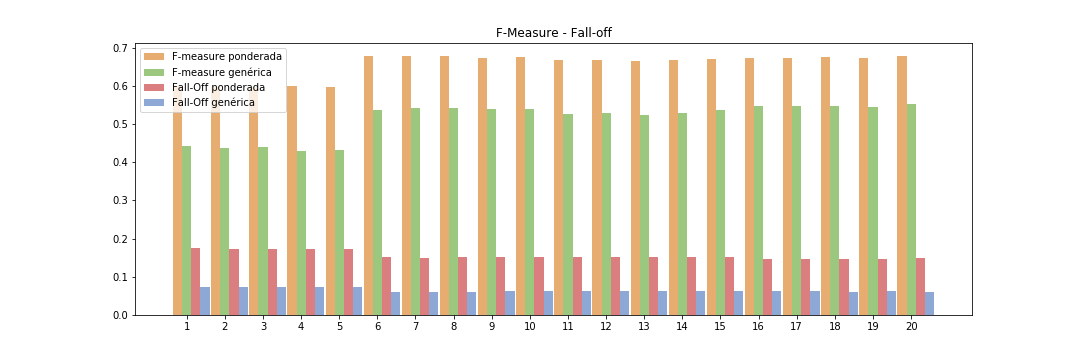

Indice,Onehot,Continuos,mEst,|,Accuracy,Precisión promediada,Precisión ponderada,Recall promediado,Recall ponderado,Fall-off promediado,Fall-off ponderado,F-Measure promediada,F-Measure ponderado
1,No,Standarization,0.0,|,0.6109,0.4701,0.6399,0.4579,0.6109,0.0737,0.1747,0.4415,0.5985
2,No,Standarization,0.01,|,0.6101,0.4633,0.6392,0.4564,0.6101,0.0736,0.1730,0.4370,0.5976
3,No,Standarization,0.5,|,0.6101,0.4658,0.6392,0.4598,0.6101,0.0737,0.1739,0.4393,0.5976
4,No,Standarization,1.0,|,0.6126,0.4553,0.6396,0.4523,0.6126,0.0732,0.1731,0.4300,0.6001
5,No,Standarization,100.0,|,0.6092,0.4553,0.6376,0.4544,0.6092,0.0738,0.1740,0.4311,0.5969
6,No,Variable,0.0,|,0.6749,0.5094,0.6822,0.5752,0.6749,0.0614,0.1509,0.5364,0.6775
7,No,Variable,0.01,|,0.6746,0.5129,0.6826,0.5810,0.6746,0.0614,0.1504,0.5409,0.6774
8,No,Variable,0.5,|,0.6749,0.5160,0.6817,0.5772,0.6749,0.0614,0.1507,0.5418,0.6772
9,No,Variable,1.0,|,0.6712,0.5130,0.6787,0.5762,0.6712,0.0618,0.1510,0.5397,0.6738
10,No,Variable,100.0,|,0.6730,0.5174,0.6797,0.5677,0.6730,0.0617,0.1519,0.5388,0.6754


In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
import getTables.py

### 3.3. Elección y comparación de representantes
***
A continuación se presenta un análisis de los resultados obtenidos, separandose en dos procesos: elección y comparación.

#### 3.3.1. Elección
***
Para determinar cuales fueron los clasificadores con mejor desempeño (denominados "representantes") frente a los posibles candidatos se siguió el siguiente proceso:
1. Utilizando el script de comparación con tablas y gráficas, se eligió aquellas configuraciones paramétricas con mejores métricas (en resumen, tomar aquellas con mayor **F-measure** y menor **Fall-off**) .
2. Para cada grupo con mejores métricas se evaluó manualmente cada configuración, comprobando todas sus métricas y buscando alguna anomalía (positiva o negativa) dentro del grupo en cuestión.
3. Para aquellos grupos con métricas similares y sin anomalías se eligió un representante de forma pseudoaleatoria (es decir, al azar pero teniendo ciertas consideraciones). Por otra parte, para aquellos grupos con métricas similares donde se detectó que alguna configuración contaba con mejores métricas en cierto aspecto, se tomó dicha configuración como representante.

De esta forma, se determinó que los representantes son los siguientes:

- Para **Naive Bayes**, la configuración que determina revertir *one hot encoding*, intervalos variables, m-estimador $m = 0.5$.
- Para **KNN**, la configuración que determina revertir *one hot encoding*, $k = 3$, distancia manhattan, norma euclídea.

#### 3.3.2. Comparación
***

A continuación se realizan observaciones e interpretaciones obtenidas al comparar los resultados obtenidos en los modelos **Naive Bayes** y **KNN**. Cabe destacar que estos modelos también serán comparados frente a **Árbol de decisión** y **Bosque de decisión**, sin embargo las observaciones de dicha comparación se detallan en la siguiente sección, utilizando solamente a los representantes obtenidos en la sección anterior.

**Observaciones generales:**

- Sobre los parámetros:
> 1. Mantener el *one hot encoding* para los atributos incidió en resultados con un desempeño mejor o similar a revertir el *one hot encoding*.
> 2. Para el modelo **Naive Bayes**, la estrategia de discretizar valores continuos en **intervalos variables** dio mejores resultados frente a asumir **distribución normal** los valores para los atributos continuos.
> 3. Para el modelo **Naive Bayes**, el parámetro **m-estimador** tuvo un impacto casi nulo en los resultados obtenidos, en el sentido de que no se percibió una variación en los resultados asociada a la variación del m-estimador.
> 4. Para el modelo **KNN**, la elección de **estrategia de normalización** varió mucho su desempeño según si el *one hot encoding* fue revertido o no.
> 5. Para el modelo **KNN** cuando al revertir el *one hot encoding*, se observó que:
    - La *norma Euclídea* dio los mejores resultados.
    - La *norma Min-Max (Reescalamiento)* dio las peores *F-measures* y malas *Fall-off*
    - La *norma Z-Score (Estandarización)* dio las peores *Fall-off* y malas *F-measure*.
    
- Sobre los resultados:
> 1. Los resultados en *Iris* fueron similares en general.
> 2. Para determinadas configuraciones paramétricas, el desempeño en *Covertype* del modelo **KNN** superó al de **Naive Bayes**, alcanzando valores considerablemente superiores para cada métrica.
> 3. Algunos resultados tuvieron una gran diferencia entre sus promedios generales y promedios ponderados (siendo los últimos bastante más altos).

Tomando en cuenta la información anterior, se determinó que para los modelos empleados, el mejor modelo para clasificar el conjunto *Covertype* es **KNN**. Sin embargo debe tenerse precaución, dado que para algunas configuraciones de los parámetros esto no es siempre el caso.

Es importante observar que las evaluaciones utilizadas, especialmente en *Covertype*, pueden estar sujetas a ruido y por tanto ofrecer información "tramposa". El implementar técnicas de análisis estadístico como *Tests de Friedman* entre múltiples evaluaciones para una misma configuración, podría ayudar a reducir esto. También el correr distintas validaciones cruzadas en *Covertype* podría dar mejores nociones sobre el modelo **KNN**.

En cualquier caso, a continuación se adjunta una serie de interpretaciones, producto de las observaciones hechas a los resultados. Dichas interpretaciones se basan en fundamentos teóricos y sensaciones empíricas, por lo que no escalan a algo más que eso, interpretaciones.

**Interpretaciones:**

- Sobre los parámetros:
> 1. Para el modelo **Naive Bayes**, se presume que el parámetro **m-estimador** tiene un impacto nulo en los resultados obtenidos, debido a que la cantidad de ocurrencias del caso borde que el **m-estimador** resuelve fue despreciable (o inclusive nula). En el caso de que haya sido nula, se pueden asociar las leves desviaciones en los resultados de cada métrica a la distribución aleatoria de ejemplos para los conjuntos de entrenamiento y validación.

- Sobre los resultados:
> 1. La diferencia entre promedios generales y ponderados se da debido a que las clases 4, 5, 6 y 7 cuentan con una mucho menor cantidad de elementos en comparación a las clases 1, 2 y 3. Al tener peor desempeño en las clases de menor proporción, los promedios ponderados dan mejor resultado por darle menos importancia a dichas clases.
> 2. Parece ser que **KNN** es un mejor modelo para clasificar conjuntos con una extensa cantidad de atributos continuos en lugar de categóricos, debido a su gran desempeño en el conjunto *Covertype*.
> 3. Parece ser que **Naive Bayes** es un mejor modelo para clasificar conjuntos con atributos categóricos, debido a que dio mejores resultados cuando se discretizaron los atributos continuos en intervalos variables que cuando se estandarizaron los valores de los mismos.

Tomando las anteriores interpretaciones, el hecho de que el **m-estimador** haya tenido impacto nulo sumado al hecho de que el desempeño de **KNN** fue mejor que el de **Naive Bayes**, parece indicar que la implementación de **Naive Bayes** con **m-estimador** sería clave en un conjunto de datos con valores discretos y posibles clasificaciones nuevas o faltantes. Dado que los conjuntos de prueba utilizados son continuos, no se pudo probar si esta hipótesis es correcta.

### 3.4. Comparación final
***
Tomando los representantes de la tarea anterior y de la tarea actual, se realizó una comparación con el objetivo de ver que modelo obtuvo mejor desempeño para la evaluación de *CoverType*.

A continuación se adjunta una tabla y una gráfica comparativa de los resultados obtenidos en cada evaluación.

<table>
    <tr>
        <th>Modelo</th>
        <th>Onehot</th>
        <th>Configuración del modelo</th>
        <th>|</th>
        <th>Accuracy</th>
        <th>Precision promediada</th>
        <th>Precision ponderada</th>
        <th>Recall promediada</th>
        <th>Recall ponderada</th>
        <th>Fall-off promediada</th>
        <th>Fall-off ponderada</th>
        <th>F-measure promediada</th>
        <th>F-measure ponderada</th>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>No</td>
        <td><b>Continuos:</b> Maximizando ganancia, <b>Medida:</b> Reducción de Impureza</td>
        <td>|</td>
        <td>0.655</td>
        <td>0.652</td>
        <td>0.653</td>
        <td>0.531</td>
        <td>0.655</td>
        <td>0.069</td>
        <td>0.197</td>
        <td>0,556</td>
        <td>0,648</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>No</td>
        <td><b>Continuos:</b> Maximizando ganancia, <b>Medida:</b> Reducción de Impureza</td>
        <td>|</td>
        <td>0.689</td>
        <td>0.438</td>
        <td>0.711</td>
        <td>0.483</td>
        <td>0.689</td>
        <td>0.059</td>
        <td>0.137</td>
        <td>0,454</td>
        <td>0,696</td>
    </tr>
    <tr>
        <td>Bayes</td>
        <td>No</td>
        <td><b>Continuos:</b> Intervalos variables, <b>mEst:</b> 0.5</td>
        <td>|</td>
        <td>0.6749</td>
        <td>0.5160</td>
        <td>0.6817</td>
        <td>0.5772</td>
        <td>0.6749</td>
        <td>0.0614</td>
        <td>0.1507</td>
        <td>0.5418</td>
        <td>0.6772</td>
    </tr>
    <tr>
        <td>KNN</td>
        <td>No</td>
        <td><b>K:</b> 3, <b>Distancia:</b> 'Manhattan', <b>Norma:</b> Euclidea</td>
        <td>|</td>
        <td>0.9565</td>
        <td>0.9358</td>
        <td>0.9564</td>
        <td>0.9101</td>
        <td>0.9565</td>
        <td>0.0098</td>
        <td>0.0266</td>
        <td>0.9223</td>
        <td>0.9564</td>
    </tr>
    <caption>Tabla 1 - Resultados de entrenamiento de conjunto <b>CoverType</b> para representantes de modelos</caption>
</table>

<div style="display: inline-block; width: 99%; text-align: center; margin-top: 16px;">
    <img src="img/finalplot.png" />
    <label style="margin-top: 16px; font-size: 16px; font-family: monospace;"> Figura 3.1 - Resultados de entrenamiento de conjunto CoverType para representantes de modelos</label>
</div>

Se puede ver que el desempeño de **Naive Bayes** fue similar al del **Árbol de Decisión**, siendo un poco mejor que el del **Bosque de Decisión**. No obstante, el modelo que sin duda tuvo un mucho mejor desempeño fue **KNN**.

Teniendo en cuenta las observaciones de la anterior sección, parece lógico que los modelos bayesianos y basados en árboles tengan un peor desempeño, ya que trabajan mejor con atributos discretos.

### 3.5 Pruebas extra
***

#### 3.5.1 Fundamentación
***
Habiendo entrenado varios modelos con distintas configuraciones paramétricas, se vio la necesidad de generar pruebas extra para ciertas consideraciones que no se tuvieron en cuenta para modelos **KNN**. Más concretamente, no se probó la opción de **no normalizar** ni la opción de utilizar una **votación ponderada**.

Por limitaciones de tiempo, se utilizaron algunos representantes de **KNN** con un buen y un mal rendimiento respectivamente, con el objetivo de detectar si dichos cambios impactan positiva o negativamente.

#### 3.5.2 Resultados obtenidos
***
A continuación se adjuntan los resultados obtenidos para algunos experimentos

**Nota:** Las filas celestes son resultados generados anteriormente y sobre los cuales se "pivoteó" los valores de la normalización y de la votación. Se agregaron a la tabla a modo de comparación.

<table>
    <tr>
        <th>Onehot</th>
        <th>K</th>
        <th>Distancia</th>
        <th>Norma</th>
        <th>Ponderado</th>
        <th>|</th>
        <th>Accuracy</th>
        <th>Precision promediada</th>
        <th>Precision ponderada</th>
        <th>Recall promediada</th>
        <th>Recall ponderada</th>
        <th>Fall-off promediada</th>
        <th>Fall-off ponderada</th>
        <th>F-measure promediada</th>
        <th>F-measure ponderada</th>
    </tr>
    <tr style="background-color: #95dcd4;">
        <th>Sí</th>
        <th>3</th>
        <th>'Manhattan'</th>
        <th>Euclídea</th>
        <th>No</th>
        <td>|</td>
        <td>0.9532</td>
        <td>0.9353</td>
        <td>0.9531</td>
        <td>0.9027</td>
        <td>0.9532</td>
        <td>0.0106</td>
        <td>0.0288</td>
        <td>0.9181</td>
        <td>0.9531</td>
    </tr>
    <tr>
        <th>Sí</th>
        <th>3</th>
        <th>'Manhattan'</th>
        <th>Ninguna</th>
        <th>No</th>
        <td>|</td>
        <td>0.9711</td>
        <td>0.9529</td>
        <td>0.9711</td>
        <td>0.9404</td>
        <td>0.9711</td>
        <td>0.0065</td>
        <td>0.0174</td>
        <td>0.9464</td>
        <td>0.9711</td>
    </tr>
    <tr>
        <th>Sí</th>
        <th>3</th>
        <th>'Manhattan'</th>
        <th>Euclídea</th>
        <th>Sí</th>
        <td>|</td>
        <td>0.9549</td>
        <td>0.9340</td>
        <td>0.9548</td>
        <td>0.9099</td>
        <td>0.9549</td>
        <td>0.0102</td>
        <td>0.0273</td>
        <td>0.9212</td>
        <td>0.9548</td>
    </tr>
    <tr style="background-color: #95dcd4;">
        <th>No</th>
        <th>1</th>
        <th>Chebychev</th>
        <th>Min Max</th>
        <th>No</th>
        <td>|</td>
        <td>0.3005</td>
        <td>0.2393</td>
        <td>0.5115</td>
        <td>0.3565</td>
        <td>0.3005</td>
        <td>0.1082</td>
        <td>0.1255</td>
        <td>0.2104</td>
        <td>0.2935</td>
    </tr>
        <tr>
        <th>No</th>
        <th>1</th>
        <th>Chebychev</th>
        <th>Min Max</th>
        <th>Sí</th>
        <td>|</td>
        <td>0.2684</td>
        <td>0.2235</td>
        <td>0.4846</td>
        <td>0.3358</td>
        <td>0.2684</td>
        <td>0.1108</td>
        <td>0.1158</td>
        <td>0.1937</td>
        <td>0.2780</td>
    </tr>
    <caption>Tabla 2 - Resultados de entrenamiento de conjunto <b>CoverType</b> para pruebas extra</caption>
</table>


#### 3.5.3 Comparación
***
Es interesante observar que para el primer ejemplo celeste, el cual tuvo muy buenos resultados, el cambiar la forma de votación y el no normalizar **ambos** tuvieron un impacto de mejora sobre las métricas, por sobretodo el no normalizar.

Esto va en contra de nuestra suposición inicial, ya que existen en *CoverType* algunos atributos con valores drásticamente mayores en magnitud frente a otros. El hecho de que el no normalizar diera mejores resultados parece indicar que dichos atributos son cruciales a la hora de clasificar y tienen un mayor peso que el resto.

Por otra parte, al tomar el segundo ejemplo celeste, el cual tuvo un mal desempeño en general, al cambiar la forma de votación a ponderada, empeoraron todas las métricas.

Para poder determinar información más concluyente debería correrse más evaluaciones variando otros parámetros. A priori parece ser que la decisión de no normalizar no fue buena.

## 4. Conclusiones
***

#### 4.1. Respecto a los Modelos
***
Si bien **Naive Bayes** tuvo un desempeño similar a al de los **Árboles de decisión** y **Bosques de decisión**, se encontró que **KNN** representó una gran mejora frente al resto dentro del conjunto *Covertype*.

Se concluye que para el conjunto *Covertype* el modelo **KNN** da como resultado el mejor clasificador en comparación al resto de los modelos con los que se experimentó. También se presume que esta afirmación debería cumplirse para conjuntos similiares a *Covertype*, es decir, conjuntos multiclase, con múltiples atributos continuos distribuidos dentro de múltiples rangos de valores, así como con una distribución no uniforme de ejemplos para cada posible clase.

Dicha declaración no puede comprobarse a ciencia cierta con los datos generados en esta experimentación, por lo que son nada más que leves conjeturas.

#### 4.2. Respecto a los Atributos
***
Se comprobó empiricamente que tanto **Naive Bayes** como **KNN** son más adecuados para ser empleados a la hora de generar un calificador para conjuntos de gran magnitud en ejemplos y atributos como lo es *Covertype*, esta afirmación es debido a que por su baja carga en el entrenamiento, fue posible generar un clasificador en un tiempo adecuado mantuviendo el *one hot encoding*, a diferencia del caso para **Árboles de decisión** y **Bosques de decisión**.

A su vez se presume que **KNN** da mejores resultados a la hora de clasificar conjuntos con una gran cantidad de atributos continuos en lugar de categoricos, sin embargo se carecen de pruebas suficientes para dar una afirmación solida respecto a este último punto.

#### 4.3. Respecto a los Parámetros
***
Un parámetro clave a la hora de observar los resultados en *Covertype* fue la utilización del *one hot encoding*; dando resultados con mejores métricas para **Naive Bayes** (al ser utilizado el *one hot encoding*) y teniendo un efecto de gran proporción en el desempeño de la **estrategia de normalización** empleada para **KNN**. Si bien se esperaba de antemano que utilizar el *one hot encoding* diese resultados iguales o mejores frente a no utilizarlo, el haber experimentado con este parámetro enriqueció en gran magnitud las observaciones y conclusiones de este estudio.

##### 4.3.1. Parámetros para Naive Bayes
***
A diferencia de lo esperado originalmente, un parámetro que tuvo muy bajo impacto en el rendimiento de los resultados al clasificar el conjunto *Covertype* fue el valor del **m-estimador**. Debido al rendimiento tan similar al variar este parámetro, como ya se mencionó anteriormente, se cree que el hecho de tratar con atributos continuos anuló la posibilidad de darle utilidad a este parámetro. De hecho, es posible (mas no se tienen pruebas) que en un conjunto de datos categórico con valores faltantes su desempeño fuera mucho mejor. 

También se destaca como independientemente al valor del resto de los parámetros, la estrategía de discretizar los atributos continuos partiendo en **intervalos variables** tuvo mejor desempeño que la interpretación como **distribución normal** de los atributos continuos (para el conjunto *Covertype*). Se presume que esto se dio debido a que **Naive Bayes** funciona mejor con atributos discretos que continuos, sin embargo, otra vez se carecen de pruebas suficientes para dar una afirmación solida respecto a este último punto.

##### 4.3.2. Parámetros para KNN
***
Al contrario a lo que se esperaba, uno de los parámetros que menos impactó los resultados obtenidos fue el parámetro $k$,  dado que variarlo se obtuvieron resultados muy similares respecto a los resultados obtenidos con distinto valor de $k$ y el mismo valor para el resto de los parámetros. Es posible que el bajo impacto de $k$ se haya dado a causa de la distribución de datos que *Covertype* posee.

Si bien todas las **funciones de distancia** probadas tuvieron un desempeño similar, se destaca como para los resultados obtenidos en el conjunto *Covertype* la **distancia manhattan** siempre dio resultados similares o levemente superiores al resto de las distancias.

Por otra parte, la **normalización con norma euclídea** se desempeñó considerablemente mejor al resto cuando no se empleó *one hot encoding*, sin embargo al emplear *one hot encoding* tuvo un desempeño bastante similar al resto de las otras normas para la mayoría de resultados obtenidos. Si bien no se evaluó exhaustivamente en la configuración paramétrica, se resalta que el mejor resultado obtenido fue al **no emplear ninguna norma**.

#### 4.4. Respecto a los Resultados
***
Nuevamente una observación primordial fue que los resultados obtenidos al validar los calificadores del conjunto *Covertype* fueron peores con respecto a los calificadores del conjunto *Iris* (pese a que KNN haya dado resultados similares para ambos conjuntos), esto tiene sentido, debido a que el conjunto *Covertype* posee una complejidad mayor respecto al conjunto *Iris*, tanto en la cantidad de clases distintas a clasificar como en en cantidad de atributos y el rango de sus valores.

Para poder establecer más información al respecto de la eficacia de los modelos, es probable que fuera necesario probar su desempeño para otros conjuntos; en particular alguno cuyas caracteristicas difieran del conjunto *Covertype*, por ejemplo un conjunto de similar magnitud pero que todos sus atributos sean categóricos.

#### 4.5. Posibles mejoras
***
Para cerrar, se adjunta una lista de mejoras consideradas a la experimentación actual:
- Probar exhaustivamente el desempeño del valor *ninguna norma* en **KNN**.
- Buscar optimizar los modelos **Árbol de decisión** y **Bosque de decisión** para que sea posible obtener resultados empleando el *one hot encoding*. Esto permitiria una mejor comparación de resultados obtenidos frente a **Naive Bayes** y **KNN**
- Fijar múltiples conjuntos de entrenamiento y validación y obtener nuevos resultados para cada configuración paramétrica. Esto permitiria realizar un *Test de Friedman* y con su análisis ad hoc, obtener observaciones de mayor o igual calidad.
- Probar los modelos y cada una de sus configuraciones paramétricas frente a otros conjuntos distintos a *Iris* y *Covertype*.